In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import umap.umap_ as umap
import seaborn as sns

D:\Python\Miniconda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
cells = pd.read_csv('PhenData_Cells.csv') #contaions individual cell data, including position, size and shape
images = pd.read_csv('PhenData_Image.csv') #contains median of the cell data per image
plate_metadata = pd.read_csv('plate_metadata.csv') # the original metadata file from Github
meta_plate_96=plate_metadata[plate_metadata['barcode'] == 'PB000096'] #reduced set of metadata based on discussion with David

#add the exposure (batch_id) to the correct image based on well_id and the first three letters in the file name
images["well_id"] = images["FileName__405"].str[:3]
images_m=pd.merge(images, meta_plate_96[["well_id", "batch_id"]], on="well_id", how="left")
#remove all of the columns that we don't want to to include in the umap analysis
analysis_df=images_m.drop(columns=["FileName__405", "FileName__488", "FileName__561", "FileName__638", "FileName__730", "well_id", 
                                   "ImageNumber", "Median_Cells_AreaShape_Center_X", "Median_Cells_AreaShape_Center_Y", 
                                   "Median_FilteredNuclei_AreaShape_Center_X", "Median_FilteredNuclei_AreaShape_Center_Y", 
                                   "ModuleError_01Images", "ModuleError_02Metadata", "batch_id"])

In [22]:
#create the umap object and training it on the data
reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_analysis)

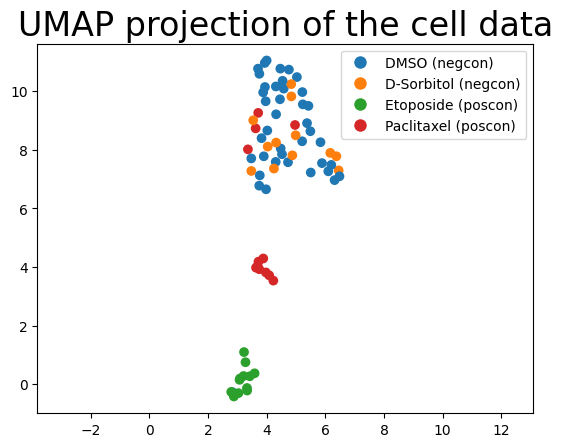

In [23]:
#plotting the data, including titel and legend to visualize the different groups
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in images_m.batch_id.map
                                                 ({"Dimethyl Sulfoxide":0, "D-Sorbitol":1, "Etoposide":2, "Paclitaxel":3})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the cell data', fontsize=24)
legend_labels = {"DMSO (negcon)":0, "D-Sorbitol (negcon)":1, "Etoposide (poscon)":2, "Paclitaxel (poscon)":3}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=sns.color_palette()[x],
                             markersize=10, label=label) for label, x in legend_labels.items()]
plt.legend(handles=legend_handles, loc='upper right')